In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import utils

plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 14

HL_THRESH = 15

patients = utils.get_patients(HL_THRESH)
ears_unf = utils.patients2ears(patients, HL_THRESH)

# drop patients without both air PTA and bone PTA
# NOTE: Must do this after the ears data set is generated
patients = patients.dropna(subset=['R Air PTA','L Air PTA'], how='any')

# ears = ears[ears['airpta'].notnull() & ears['bonepta'].notnull() & ears['airbonegap'].notnull()]
ears = ears_unf.query('airpta.notnull() and bonepta.notnull() and airbonegap.notnull()')

In [15]:
x.head()

,Age,Gender_Male,Subtype of OI_III,Subtype of OI_IV,Subtype of OI_V,Subtype of OI_VIII
0,15.901370,1,0,1,0,0
1,15.901370,1,0,1,0,0
2,14.575342,1,1,0,0,0
4,8.619178,1,0,0,0,0
5,8.619178,1,0,0,0,0


In [21]:
import pymc3 as pm

x = pd.get_dummies(ears[['Gender','Subtype of OI','Age','airpta']].rename(columns={'Subtype of OI': 'subtype_of_OI'}), columns=['Gender','subtype_of_OI'], drop_first=True)
# y = x.pop('airpta')

# Use PyMC3 to construct a model context
with pm.Model():
    # Create the glm using the Patsy model syntax
    # We use a Normal distribution for the likelihood
    pm.GLM.from_formula(
      'airpta ~ 1 + Age + Gender_Male + subtype_of_OI_III + subtype_of_OI_IV + subtype_of_OI_V + subtype_of_OI_VIII',
      x, family='normal')

    # Calculate the trace
    trace = pm.sample(random_seed=42, progressbar=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, subtype_of_OI_VIII, subtype_of_OI_V, subtype_of_OI_IV, subtype_of_OI_III, Gender_Male, Age, Intercept]
Sampling 4 chains: 100%|██████████| 4000/4000 [03:09<00:00, 21.07draws/s] 
The acceptance probability does not match the target. It is 0.8856517000587082, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8911728110476805, but should be close to 0.8. Try to increase the number of tuning steps.


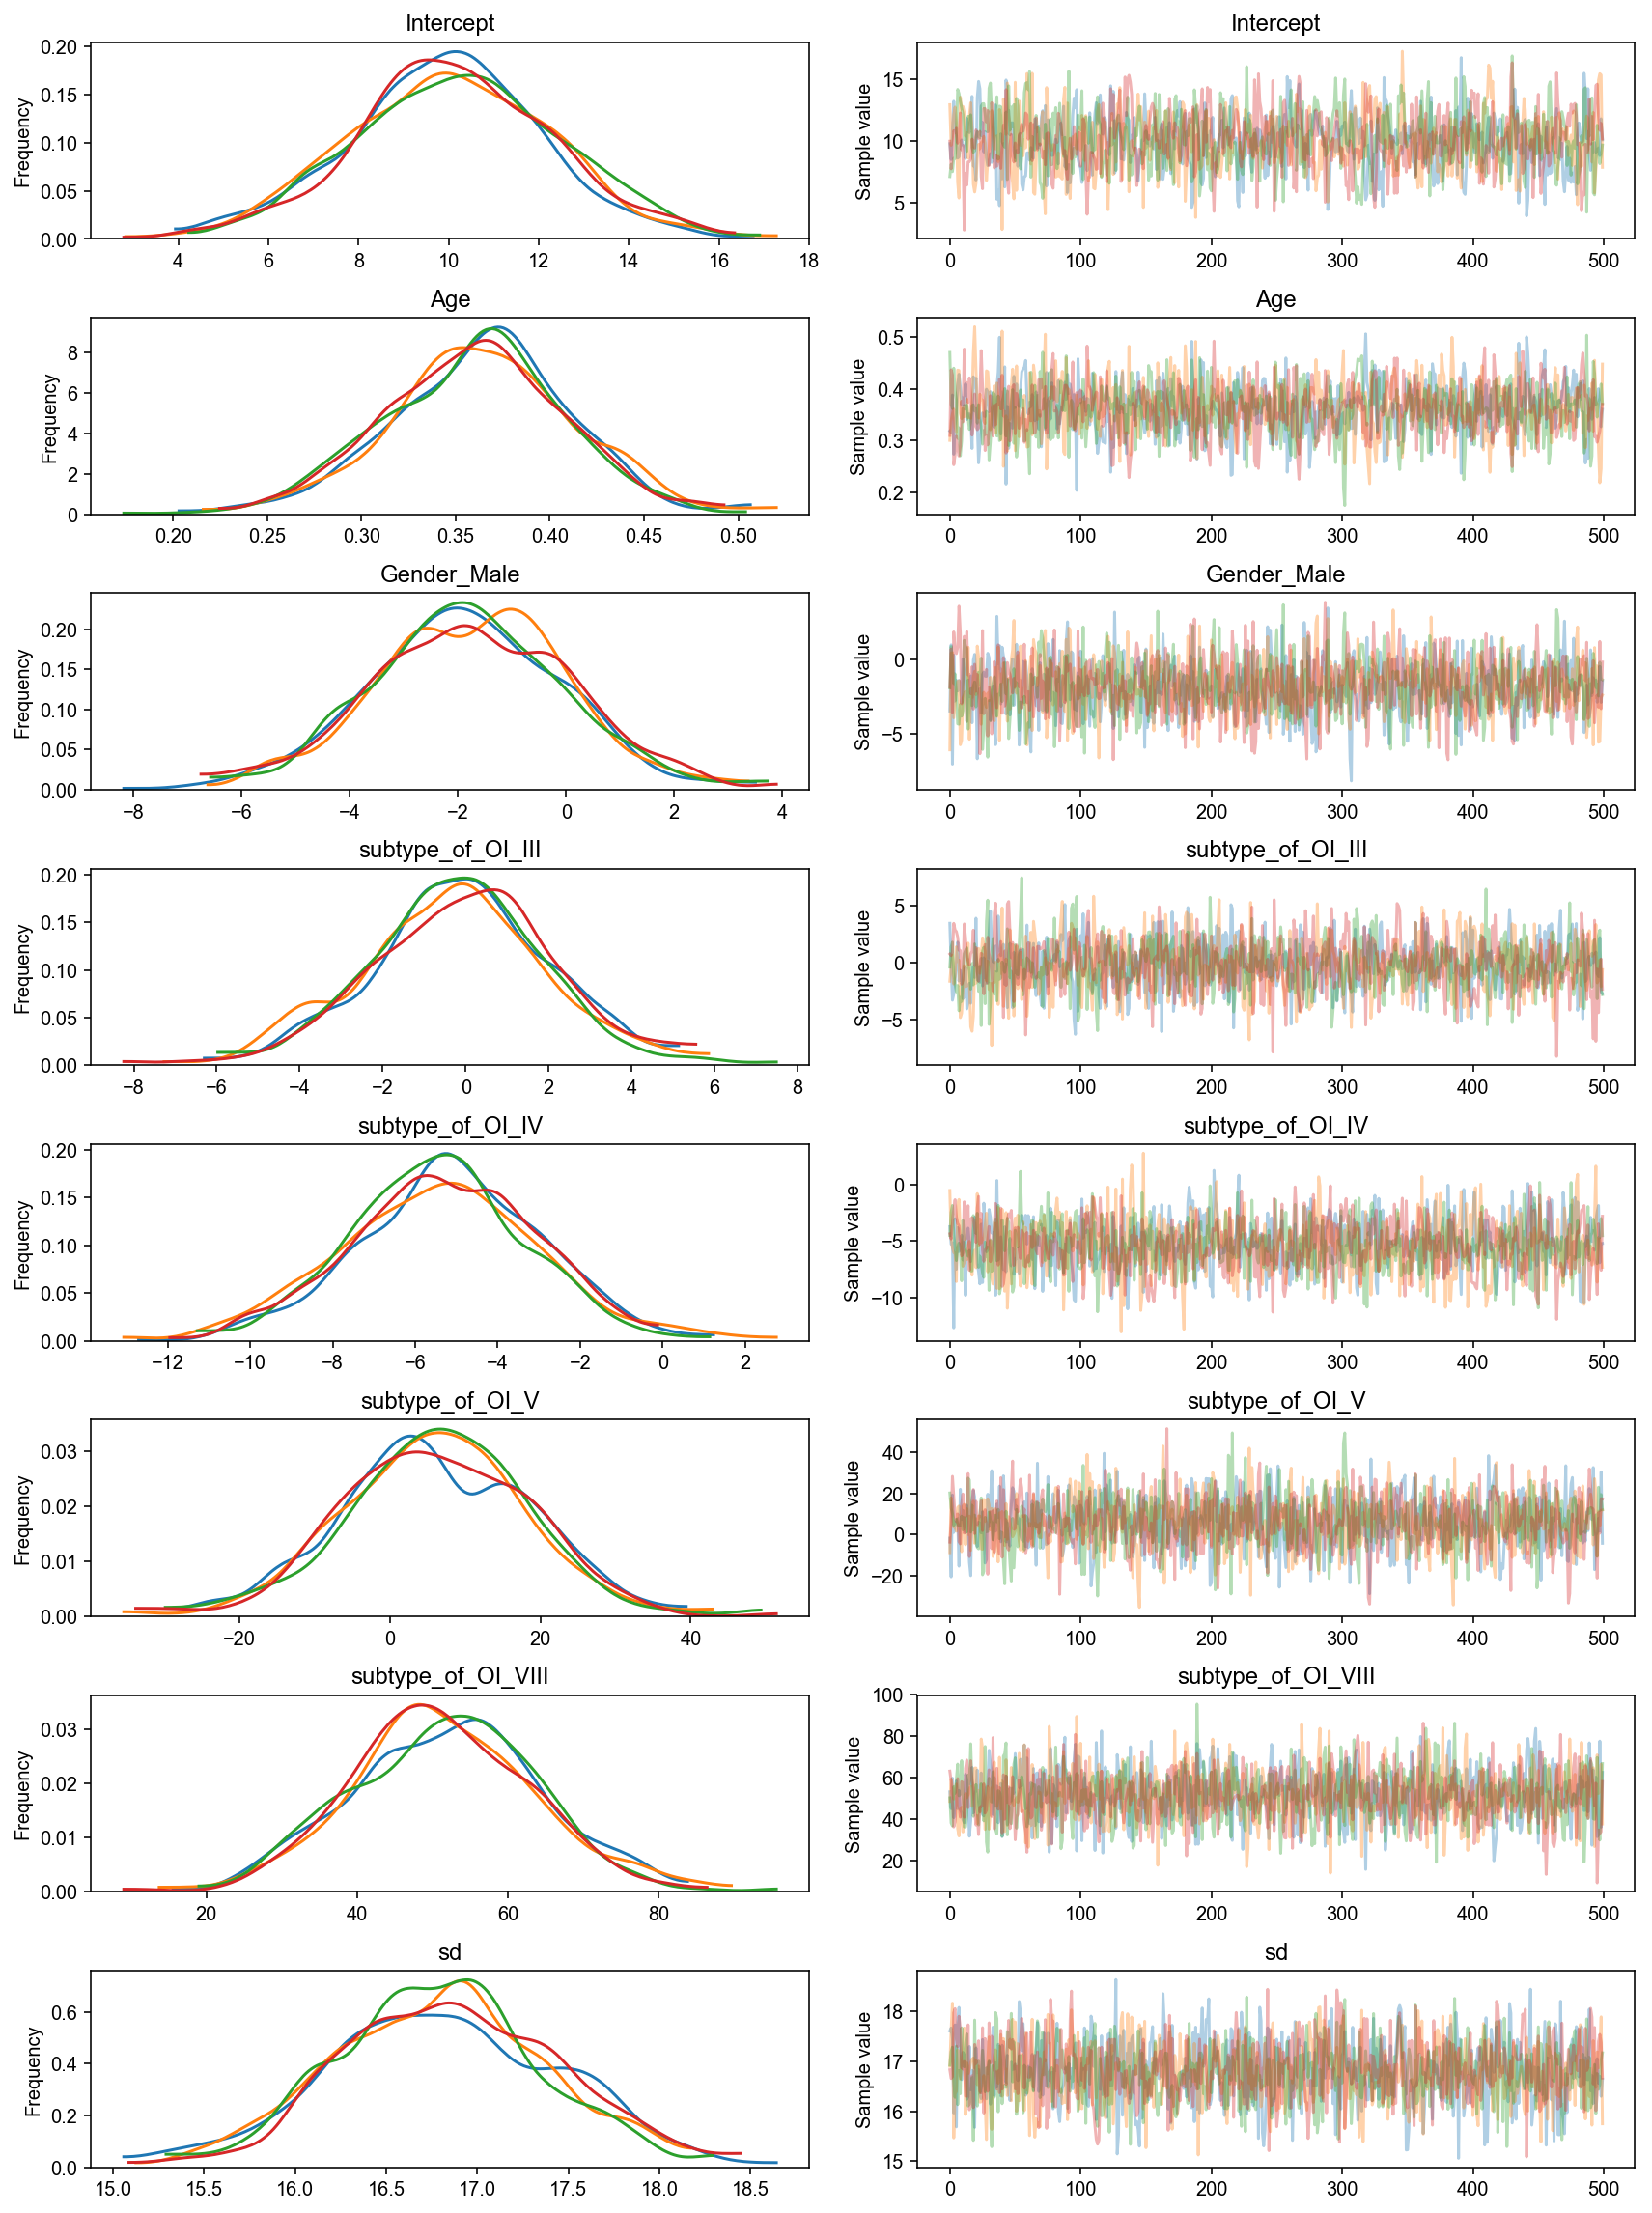

In [24]:
pm.traceplot(trace);